In [33]:
# load modules
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#load data
ds=xr.open_dataset('ERSST_monthly_1990_2021_2degree_global.nc')

In [35]:
#show data
ds

<xarray.Dataset>
Dimensions:    (time: 373, lon: 180, lat: 89, nbnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 1990-01-01 1990-02-01 ... 2021-01-01
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan nan
    time_bnds  (time, nbnds) float64 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
Attributes: (12/40)
    CDI:                       Climate Data Interface version 1.9.7.1 (http:/...
    history:                   Fri Jan 12 17:58:21 2024: cdo selyear,1990/202...
    source:                    In situ data: ICOADS R3.0 before 2015, NCEP in...
    institution:               This version written at NOAA/ESRL PSD: obtaine...
    Conventions:               CF-1.6, ACDD-1.3
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    ...                        ...
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2021-03-07
    NCO:                       netCDF Operators version 4.8.1 (Homepage = htt...
    CDO:                       Climate Data Operators version 1.9.7.1 (http:/...

In [6]:
sst=ds.sst # sst variable

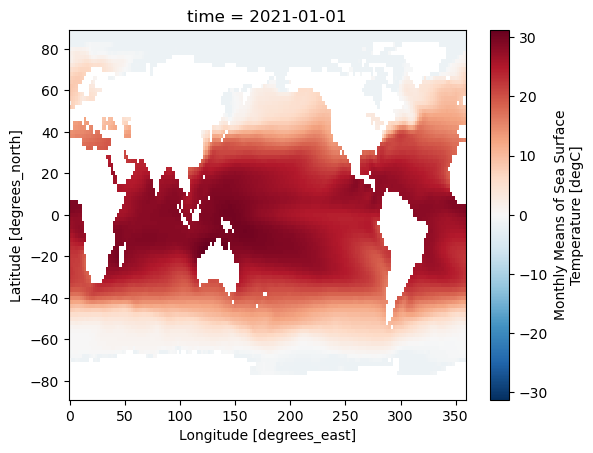

In [7]:
sst[-1].plot()

In [10]:
# cosine weight for latitude grids
weights = np.cos(np.deg2rad(sst.lat))
weights.name = "weights"


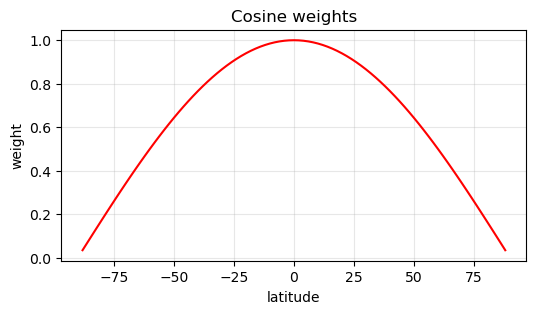

In [36]:
# plot cosine weights
plt.figure(figsize=(6,3))
plt.plot(sst.lat,weights,color='r')
plt.xlabel('latitude')
plt.ylabel('weight')
plt.title ('Cosine weights')
plt.grid(alpha=0.3)

In [38]:
# apply cosine weight to SST & find global mean SST for weighted data
sst_weighted = sst.weighted(weights)
sst_weighted_mean = sst_weighted.mean(dim=['lat','lon'])

In [39]:
#global mean SST for un-weighted data
sst_unweighted_mean=sst.mean(dim=['lat','lon'])

Text(0.5, 1.0, 'Global mean SST')

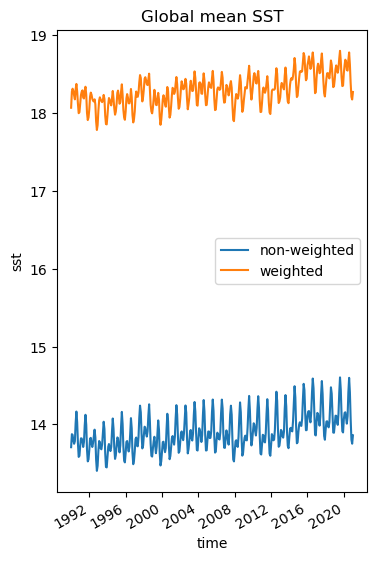

In [45]:
# plot outputs
plt.figure(figsize=(4,6))

sst_unweighted_mean.plot(label='non-weighted')
sst_weighted_mean.plot(label='weighted')
plt.legend()
plt.title('Global mean SST')

In [ ]:
## tropical  grids have more weight than poles, due to Earth's shape. 